In [9]:
import torch
from conex import Conv2dFilter
from matplotlib import pyplot as plt
from PIL import Image
from conex.helpers.filters import DoGFilter, GaborFilter
from torchvision.transforms import transforms

from src.plots.utils import plot_kernel_3d

# Analyzing filters and their parameters

### a) DoG Filter
Let's first plot the filters themselves

In [2]:
# Create DoG Filter
dog_kernel_low = DoGFilter(30, 3, 6, zero_mean=True, one_sum=True)

dog_kernel_high = DoGFilter(30, 4, 8, zero_mean=True, one_sum=True)

dog_kernel_off = DoGFilter(30, 6, 3, zero_mean=True, one_sum=True)

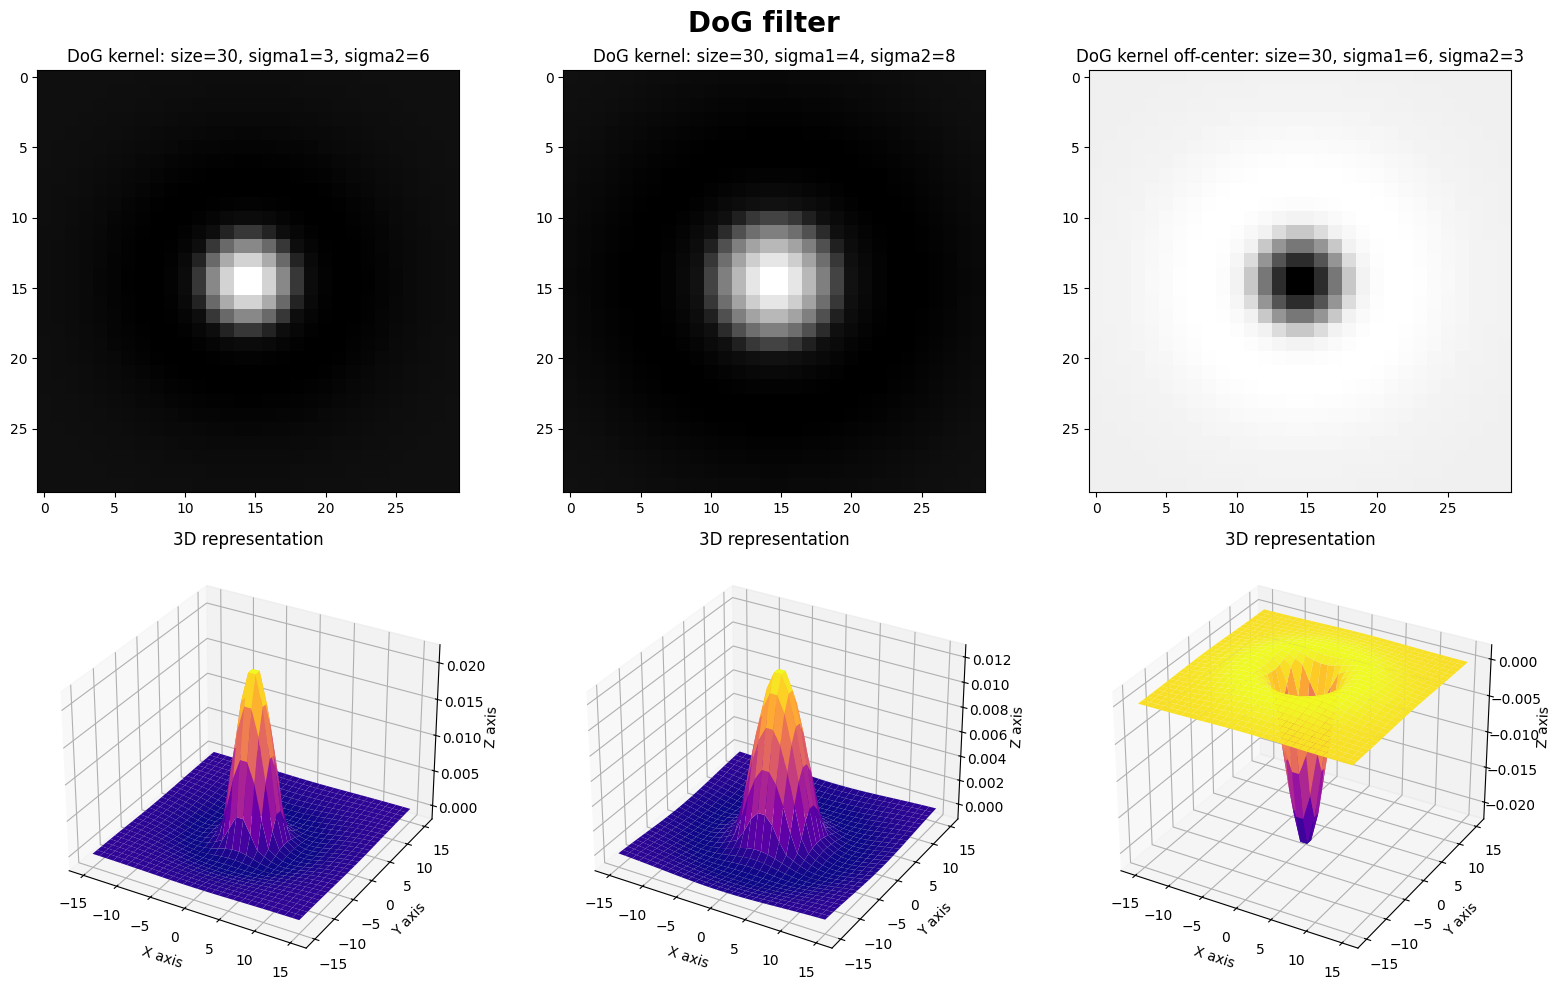

In [3]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(dog_kernel_low, cmap='gray')
ax1.set_title(f"DoG kernel: size=30, sigma1=3, sigma2=6")

ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(dog_kernel_high, cmap='gray')
ax2.set_title(f"DoG kernel: size=30, sigma1=4, sigma2=8")

ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(dog_kernel_off, cmap='gray')
ax3.set_title(f"DoG kernel off-center: size=30, sigma1=6, sigma2=3")

ax4 = fig.add_subplot(2, 3, 4, projection='3d')
plot_kernel_3d(ax=ax4, kernel=dog_kernel_low, cmap='plasma')
ax4.set_title(f"3D representation")

ax5 = fig.add_subplot(2, 3, 5, projection='3d')
plot_kernel_3d(ax=ax5, kernel=dog_kernel_high, cmap='plasma')
ax5.set_title(f"3D representation")

ax6 = fig.add_subplot(2, 3, 6, projection='3d')
plot_kernel_3d(ax=ax6, kernel=dog_kernel_off, cmap='plasma')
ax6.set_title(f"3D representation")

fig.suptitle("DoG filter", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("../report/plots/part1-DoG-Kernel.pdf")
plt.show()

### b) Gabor Filter

In [7]:
# Create Gabor Filter
# gabor_kernel = GaborFilter(size=15, labda=7.0, theta=np.pi/6, sigma=4.0, gamma=0.4, zero_mean=True, one_sum=True).unsqueeze(0).unsqueeze(0)
gabor_kernel_base = GaborFilter(size=31, labda=10.0, theta=0, sigma=5.0, gamma=1.0, zero_mean=True, one_sum=True)
gabor_kernel_labda = GaborFilter(size=31, labda=20.0, theta=0, sigma=5.0, gamma=1.0, zero_mean=True, one_sum=True)
gabor_kernel_theta = GaborFilter(size=31, labda=10.0, theta=torch.pi / 4, sigma=5.0, gamma=1.0, zero_mean=True, one_sum=True)
gabor_kernel_sigma = GaborFilter(size=31, labda=10.0, theta=0, sigma=8.0, gamma=1.0, zero_mean=True, one_sum=True)
gabor_kernel_gamma = GaborFilter(size=31, labda=10.0, theta=0, sigma=5.0, gamma=0.5, zero_mean=True, one_sum=True)


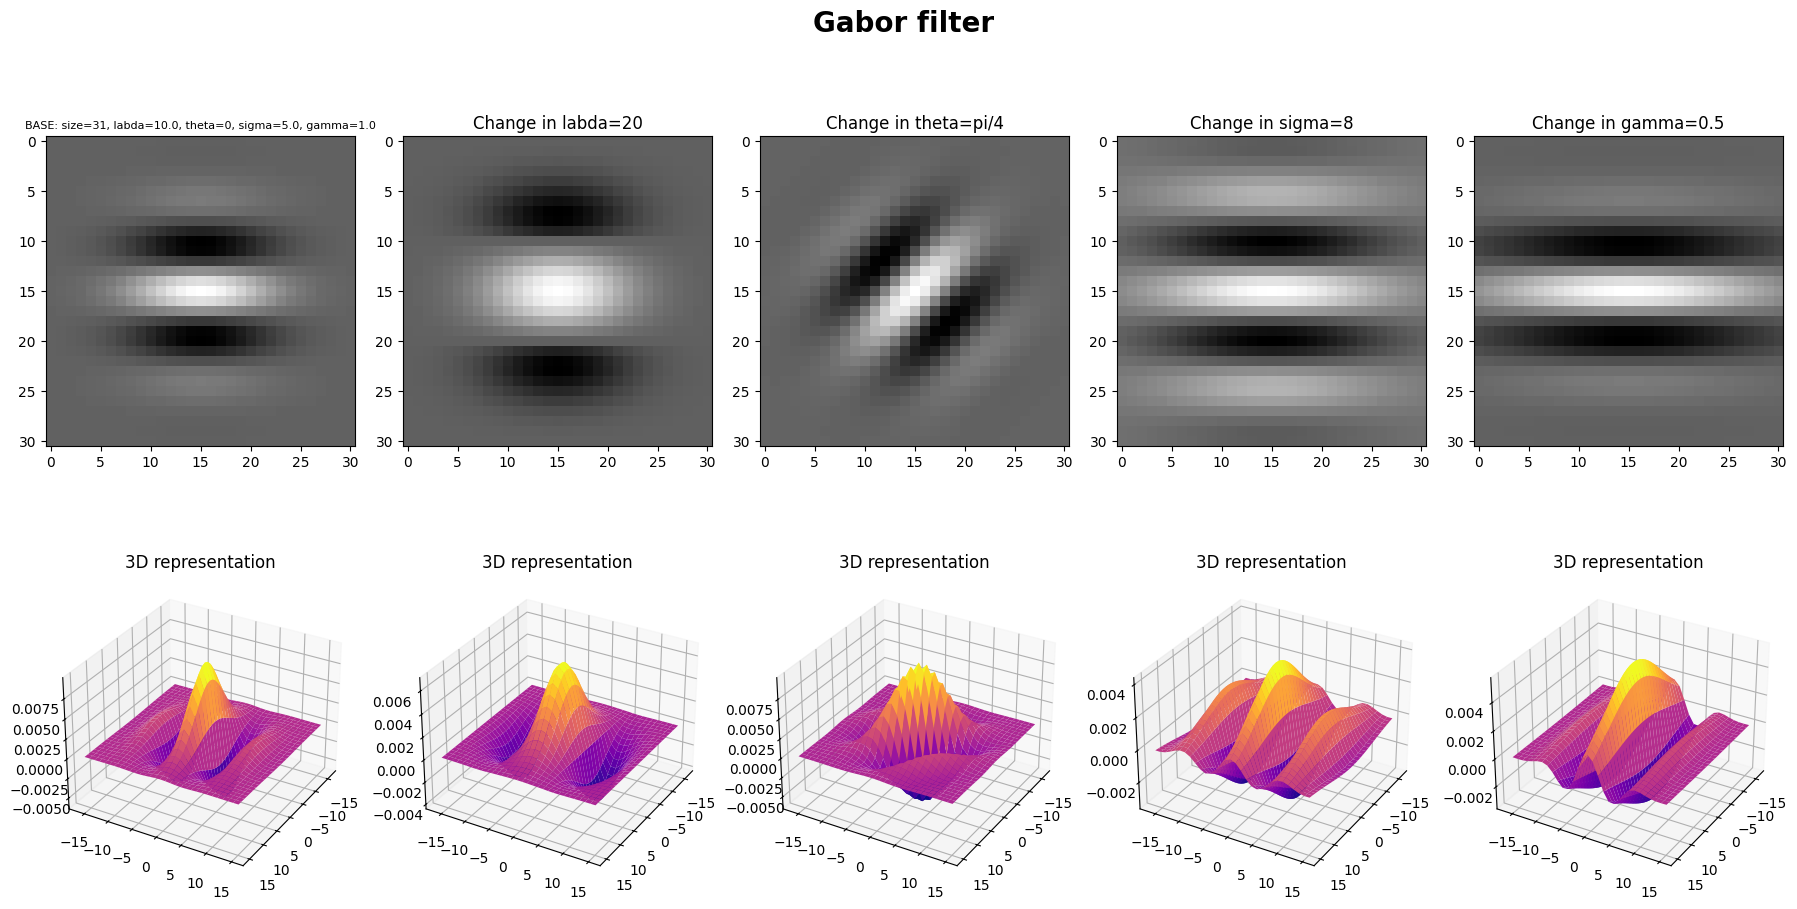

In [8]:
fig = plt.figure(figsize=(18, 10))

ax1 = fig.add_subplot(2, 5, 1)
ax1.imshow(gabor_kernel_base, cmap='gray')
ax1.set_title(f"BASE: size=31, labda=10.0, theta=0, sigma=5.0, gamma=1.0", fontsize=8)

ax2 = fig.add_subplot(2, 5, 2)
ax2.imshow(gabor_kernel_labda, cmap='gray')
ax2.set_title(f"Change in labda=20")

ax3 = fig.add_subplot(2, 5, 3)
ax3.imshow(gabor_kernel_theta, cmap='gray')
ax3.set_title(f"Change in theta=pi/4")

ax4 = fig.add_subplot(2, 5, 4)
ax4.imshow(gabor_kernel_sigma, cmap='gray')
ax4.set_title(f"Change in sigma=8")

ax5 = fig.add_subplot(2, 5, 5)
ax5.imshow(gabor_kernel_gamma, cmap='gray')
ax5.set_title(f"Change in gamma=0.5")

ax6 = fig.add_subplot(2, 5, 6, projection='3d', elev=30, azim=30)
plot_kernel_3d(ax=ax6, kernel=gabor_kernel_base, cmap='plasma', ax_label=False)
ax6.set_title(f"3D representation")

ax7 = fig.add_subplot(2, 5, 7, projection='3d', elev=30, azim=30)
plot_kernel_3d(ax=ax7, kernel=gabor_kernel_labda, cmap='plasma', ax_label=False)
ax7.set_title(f"3D representation")

ax8 = fig.add_subplot(2, 5, 8, projection='3d', elev=30, azim=30)
plot_kernel_3d(ax=ax8, kernel=gabor_kernel_theta, cmap='plasma', ax_label=False)
ax8.set_title(f"3D representation")

ax9 = fig.add_subplot(2, 5, 9, projection='3d', elev=30, azim=30)
plot_kernel_3d(ax=ax9, kernel=gabor_kernel_sigma, cmap='plasma', ax_label=False)
ax9.set_title(f"3D representation")

ax10 = fig.add_subplot(2, 5, 10, projection='3d', elev=30, azim=30)
plot_kernel_3d(ax=ax10, kernel=gabor_kernel_gamma, cmap='plasma', ax_label=False)
ax10.set_title(f"3D representation")

fig.suptitle("Gabor filter", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("../report/plots/part1-Gabor-Kernel.pdf")
plt.show()

# Applying filters on images

a) DoG filter:

In [10]:
# Read a PIL image
img = Image.open('../dataset/samples/1.tif').convert('L')  # Convert to grayscale
transform = transforms.Compose([
    transforms.ToTensor()  # Converts to Tensor, scales to [0, 1] float
])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch and channel dimensions

In [11]:
# Create DoG kernels
dog_kernel_low = DoGFilter(15, 1, 2, zero_mean=True, one_sum=True).unsqueeze(0).unsqueeze(0)
dog_kernel_high = DoGFilter(15, 2, 4, zero_mean=True, one_sum=True).unsqueeze(0).unsqueeze(0)

In [12]:
# Create DoG Filters
dog_filter_low = Conv2dFilter(dog_kernel_low, padding='same')
dog_filter_high = Conv2dFilter(dog_kernel_high, padding='same')

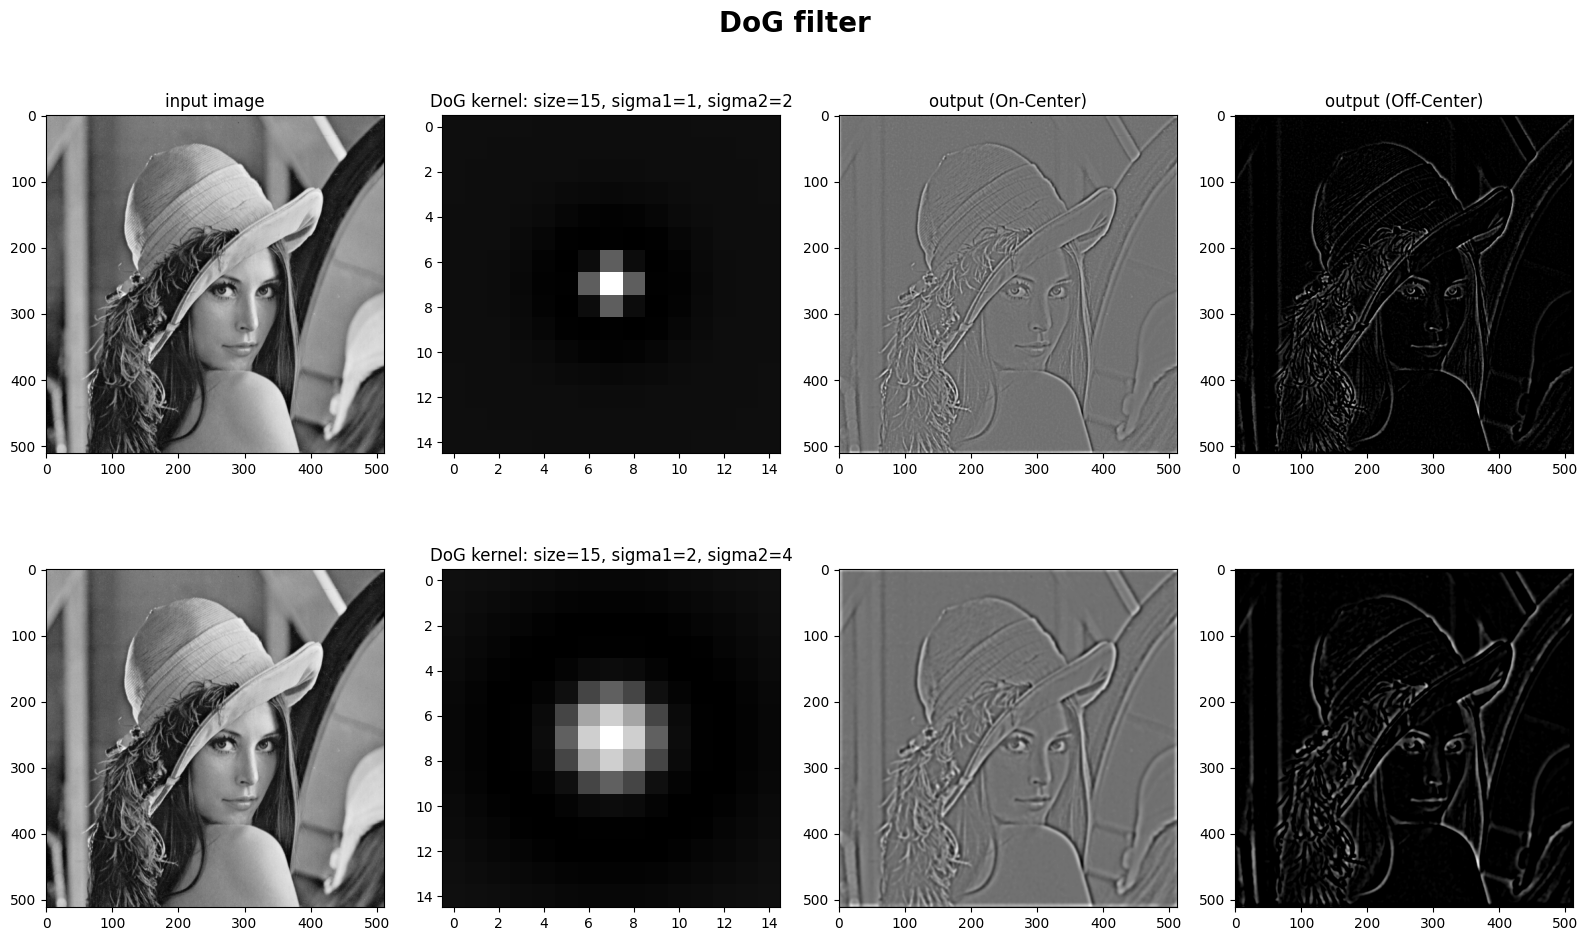

In [13]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 4, 1)
ax1.imshow(img_tensor.squeeze(0).squeeze(0), cmap='gray')
ax1.set_title("input image")

ax2 = fig.add_subplot(2, 4, 2)
ax2.imshow(dog_kernel_low.squeeze(0).squeeze(0), cmap='gray')
ax2.set_title(f"DoG kernel: size=15, sigma1=1, sigma2=2")

ax3 = fig.add_subplot(2, 4, 3)
ax3.imshow( dog_filter_low(img_tensor).squeeze(0).squeeze(0), cmap='gray')
ax3.set_title("output (On-Center)")

ax4 = fig.add_subplot(2, 4, 4)
ax4.imshow( Conv2dFilter(-1*dog_kernel_low, padding='same')(img_tensor).clamp(0, 1).squeeze(0).squeeze(0), cmap='gray')
ax4.set_title("output (Off-Center)")

ax5 = fig.add_subplot(2, 4, 5)
ax5.imshow(img_tensor.squeeze(0).squeeze(0), cmap='gray')
# ax5.set_title("input image")

ax6 = fig.add_subplot(2, 4, 6)
ax6.imshow(dog_kernel_high.squeeze(0).squeeze(0), cmap='gray')
ax6.set_title(f"DoG kernel: size=15, sigma1=2, sigma2=4")

ax7 = fig.add_subplot(2, 4, 7)
ax7.imshow(dog_filter_high(img_tensor).squeeze(0).squeeze(0), cmap='gray')
# ax7.set_title("output (On-Center)")

ax8 = fig.add_subplot(2, 4, 8)
ax8.imshow( Conv2dFilter(-1*dog_kernel_high, padding='same')(img_tensor).clamp(0, 1).squeeze(0).squeeze(0), cmap='gray')
# ax8.set_title("output (Off-Center)")

fig.suptitle("DoG filter", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("../report/plots/part1-DoG-convolution.pdf")
plt.show()

b) Gabor filter:

In [14]:
gabor_filter_base = Conv2dFilter(gabor_kernel_base.unsqueeze(0).unsqueeze(0), padding='same')
gabor_filter_labda = Conv2dFilter(gabor_kernel_labda.unsqueeze(0).unsqueeze(0), padding='same')
gabor_filter_theta = Conv2dFilter(gabor_kernel_theta.unsqueeze(0).unsqueeze(0), padding='same')
gabor_filter_sigma = Conv2dFilter(gabor_kernel_sigma.unsqueeze(0).unsqueeze(0), padding='same')
gabor_filter_gamma = Conv2dFilter(gabor_kernel_gamma.unsqueeze(0).unsqueeze(0), padding='same')
gabor_kernels = [gabor_kernel_base, gabor_kernel_labda, gabor_kernel_theta, gabor_kernel_sigma, gabor_kernel_gamma]
gabor_filters = [gabor_filter_base, gabor_filter_labda, gabor_filter_theta, gabor_filter_sigma, gabor_filter_gamma]
gabor_titles = ['BASE: size=31, labda=10.0, theta=0, sigma=5.0, gamma=1.0', 'Change in labda=20', 'Change in theta=pi/4', 'Change in sigma=8', 'Change in gamma=0.5']

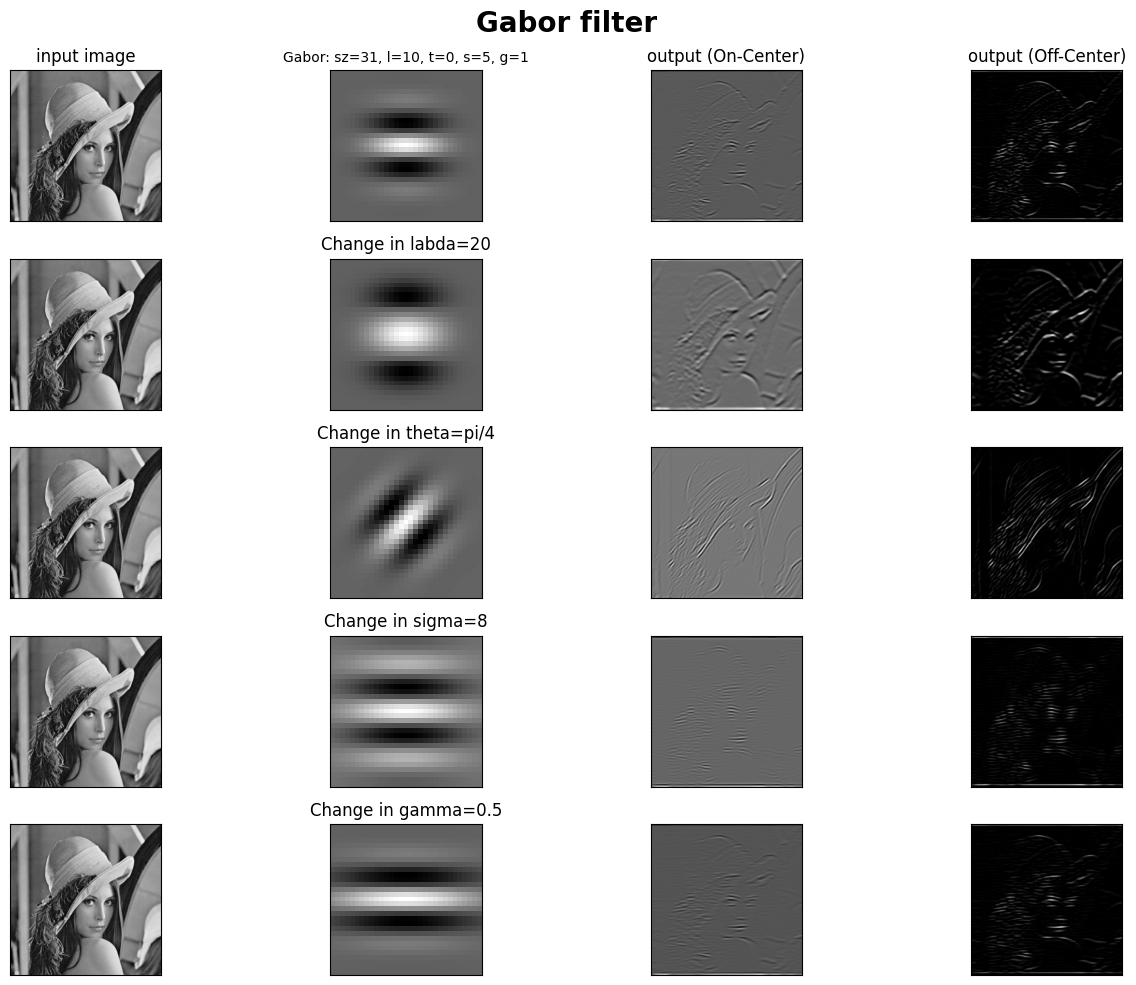

In [15]:
fig = plt.figure(figsize=(14, 10))

for i in range(5):
    ax = fig.add_subplot(5, 4, 4 * i + 1)
    ax.imshow(img_tensor.squeeze(0).squeeze(0), cmap='gray')
    ax.set_title("input image") if i==0 else None
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(5, 4, 4 * i + 2)
    ax.imshow(gabor_kernels[i].squeeze(0).squeeze(0), cmap='gray')
    ax.set_title("Gabor: sz=31, l=10, t=0, s=5, g=1", fontsize=10) if i==0 else ax.set_title(gabor_titles[i%5])
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(5, 4, 4 * i + 3)
    ax.imshow(gabor_filters[i](img_tensor).squeeze(0).squeeze(0), cmap='gray')
    ax.set_title("output (On-Center)") if i==0 else None
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(5, 4, 4 * i + 4)
    ax.imshow( Conv2dFilter(-1*gabor_kernels[i].unsqueeze(0).unsqueeze(0), padding='same')(img_tensor).clamp(0, 1).squeeze(0).squeeze(0), cmap='gray')
    ax.set_title("output (Off-Center)") if i==0 else None
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle("Gabor filter", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig("../report/plots/part1-Gabor-convolution.pdf")
plt.show()